In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# --- Configuration --- #
IMG_SIZE = 224
#DATA_DIR = '/content/drive/MyDrive/ASL Project/Data'
DATA_DIR = 'D:/Vrutika/projects/Sign Language Detection/Sign Language Detection/Data'


In [5]:
# --- Data Loading and Preprocessing --- #
print("\n--- Starting Data Loading and Preprocessing ---")

# Get the list of gesture categories from the 'Data' directory
categories = [folder_name for folder_name in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, folder_name))]

# Filter out any hidden files or system directories that might be in 'Data'
categories = sorted([c for c in categories if not c.startswith('.')])

if not categories:
    print(f"Warning: No valid gesture categories found in '{DATA_DIR}'. Please ensure your 'Data' folder contains subfolders with image files.")
else:
    print(f"Detected gesture categories: {categories}")

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each gesture category and load images
for category in categories:
    path = os.path.join(DATA_DIR, category)
    if not os.path.exists(path):
        print(f"Warning: Directory '{path}' not found. Skipping category '{category}'.")
        continue

    print(f"Loading images for category: {category}")
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)

            # Skip non-image files and hidden files
            if not (img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')) and not img_name.startswith('.')):
                continue

            img = cv2.imread(img_path)

            # Check if image was loaded successfully
            if img is None:
                print(f"Warning: Could not load image {img_name} from {path}. Skipping.")
                continue

            # Resize the image to IMG_SIZE x IMG_SIZE
            img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img_resized)
            labels.append(category)
        except Exception as e:
            print(f"Error processing image {img_name} in {path}: {e}")

print(f"Loaded {len(images)} images from {len(categories)} categories.")

# Add a check for empty dataset before proceeding with normalization, encoding, and splitting
if len(images) == 0:
    print("No images were loaded. Cannot proceed with data normalization, encoding, and splitting. Please ensure 'Data' folder is correctly uploaded and contains images.")

    X_train, X_val, y_train, y_val = None, None, None, None # Set to None if no data
    label_binarizer = None
else:
    # Convert lists to NumPy arrays
    X = np.array(images)
    y = np.array(labels)

    # Normalize image pixel values to [0, 1]
    X = X / 255.0

    # Encode categorical string labels into numerical format
    label_binarizer = LabelBinarizer()
    y_encoded = label_binarizer.fit_transform(y)

    # Split the data into training and validation sets
    # Using stratify=y_encoded ensures that the proportion of classes is the same in both train and test sets.
    X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    print(f"Dataset prepared:\n  Training images: {X_train.shape}\n  Training labels: {y_train.shape}\n  Validation images: {X_val.shape}\n  Validation labels: {y_val.shape}")
    print(f"Classes: {label_binarizer.classes_}")

print("--- Data Loading and Preprocessing Complete ---")


--- Starting Data Loading and Preprocessing ---
Detected gesture categories: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'ILoveYou', 'J', 'K', 'L', 'M', 'More', 'N', 'Name', 'O', 'P', 'Q', 'R', 'S', 'T', 'Thank you', 'U', 'V', 'W', 'X', 'Y']
Loading images for category: 1
Loading images for category: 10
Loading images for category: 2
Loading images for category: 3
Loading images for category: 4
Loading images for category: 5
Loading images for category: 6
Loading images for category: 7
Loading images for category: 8
Loading images for category: 9
Loading images for category: A
Loading images for category: B
Loading images for category: C
Loading images for category: D
Loading images for category: E
Loading images for category: F
Loading images for category: G
Loading images for category: H
Loading images for category: I
Loading images for category: ILoveYou
Loading images for category: J
Loading images for category: K
Loading images

# Training

CNN

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Get the number of classes from the encoded labels
num_classes = y_encoded.shape[1]

print(f"Number of classes: {num_classes}")

# --- Model Definition --- #
print("\n--- Defining the CNN Model ---")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer with num_classes and softmax for multi-class classification
])

# --- Model Compilation --- #
print("--- Compiling the Model ---")
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Appropriate loss for multi-class classification
              metrics=['accuracy'])

model.summary()

# --- Model Training --- #
print("\n--- Training the Model ---")
# Define batch size and number of epochs
batch_size = 32
epochs = 35

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val))

print("--- Model Training Complete ---")

Number of classes: 39

--- Defining the CNN Model ---
--- Compiling the Model ---


c:\Users\vrtkp\anaconda3\envs\signlang310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,173,991 (42.63 MB)

 Trainable params: 11,173,991 (42.63 MB)

 Non-trainable params: 0 (0.00 B)


--- Training the Model ---
Epoch 1/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 742ms/step - accuracy: 0.0325 - loss: 3.7977 - val_accuracy: 0.0323 - val_loss: 3.5032
Epoch 2/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 676ms/step - accuracy: 0.2045 - loss: 3.0187 - val_accuracy: 0.6903 - val_loss: 1.9575
Epoch 3/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 811ms/step - accuracy: 0.5812 - loss: 1.5317 - val_accuracy: 0.8968 - val_loss: 0.5348
Epoch 4/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 741ms/step - accuracy: 0.7792 - loss: 0.7139 - val_accuracy: 0.9677 - val_loss: 0.2272
Epoch 5/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 725ms/step - accuracy: 0.8718 - loss: 0.4412 - val_accuracy: 0.9419 - val_loss: 0.2062
Epoch 6/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 732ms/step - accuracy: 0.9091 - loss: 0.3021 - val_accuracy: 0.9677 - val_loss: 0.1786
Epoch 7/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 735ms/step - accuracy: 0.9107 - loss: 0.2506 - val_accuracy: 0.9548 - val_loss: 0.2140
Epoch 8/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 722ms/step - accuracy: 0.92

In [13]:
# --- Print final training and validation accuracy/loss --- #
print("CNN Model Training Complete!")
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])


CNN Model Training Complete!
Final Training Accuracy: 0.9853895902633667
Final Validation Accuracy: 0.9741935729980469
Final Training Loss: 0.04035956785082817
Final Validation Loss: 0.21423909068107605


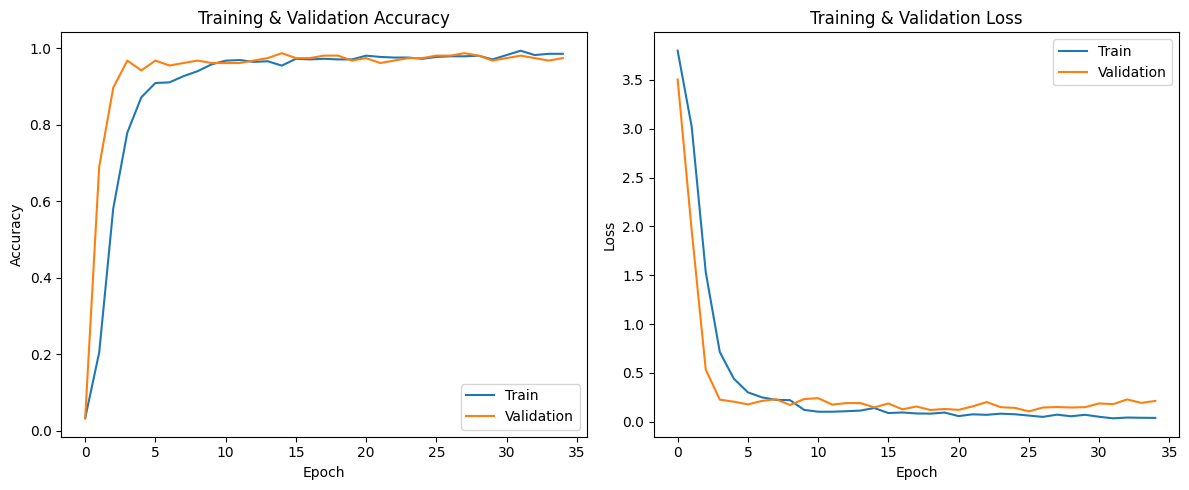

In [14]:
import matplotlib.pyplot as plt

# --- Plot training accuracy and loss --- #
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [15]:
# --- Evaluate on validation set --- #
print("\n--- Evaluating Model Performance on Validation Data ---")
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")



--- Evaluating Model Performance on Validation Data ---
Validation Loss: 0.2142
Validation Accuracy: 0.9742


Model 2 - MobileNetV2 Transfer Learning

In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Define model architecture
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

model2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
history2 = model2.fit(
    X_train, y_train,
    epochs=35,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 694ms/step - accuracy: 0.1542 - loss: 3.2895 - val_accuracy: 0.5613 - val_loss: 2.2526
Epoch 2/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 543ms/step - accuracy: 0.4562 - loss: 2.0818 - val_accuracy: 0.8387 - val_loss: 1.3162
Epoch 3/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 532ms/step - accuracy: 0.6299 - loss: 1.4408 - val_accuracy: 0.9613 - val_loss: 0.7264
Epoch 4/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 841ms/step - accuracy: 0.7695 - loss: 0.9866 - val_accuracy: 0.9613 - val_loss: 0.4896
Epoch 5/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 943ms/step - accuracy: 0.8182 - loss: 0.7410 - val_accuracy: 0.9677 - val_loss: 0.3283
Epoch 6/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 939ms/step - accuracy: 0.8523 - loss: 0.5855 - val_accuracy: 0.9871 - val_loss: 0.2385
Epoch 7/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 625ms/step - accuracy: 0.9010 - loss: 0.4715 - val_accuracy: 0.9871 - val_loss: 0.1629
Epoch 8/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 539ms/step - accuracy: 0.9042 - loss: 0.4048 - val_accu

MobileNetV2 Training Complete!
Final Training Accuracy: 0.9951298832893372
Final Validation Accuracy: 0.9935483932495117


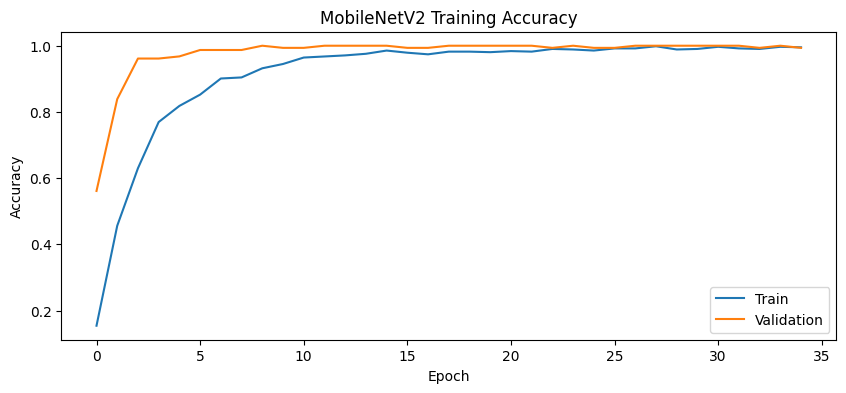

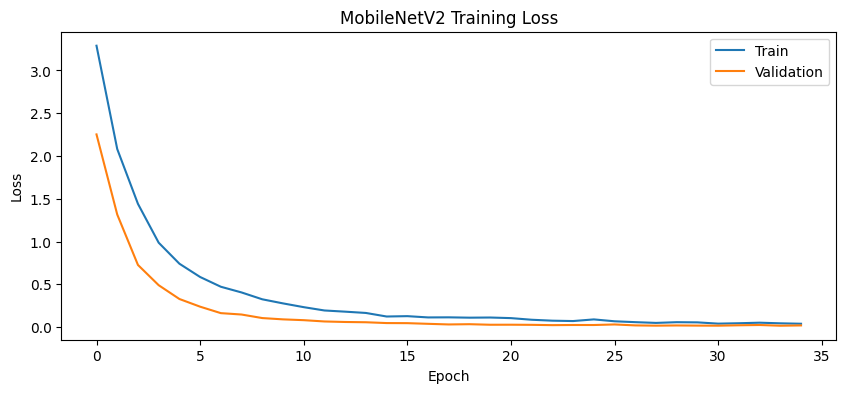

In [17]:
# Print training and validation accuracy/loss after training
print("MobileNetV2 Training Complete!")
print("Final Training Accuracy:", history2.history['accuracy'][-1])
print("Final Validation Accuracy:", history2.history['val_accuracy'][-1])

# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.title("MobileNetV2 Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Validation')
plt.title("MobileNetV2 Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Visulization


--- Evaluating Model Performance ---
Validation Loss: 0.2142
Validation Accuracy: 0.9742

--- Plotting Training History ---


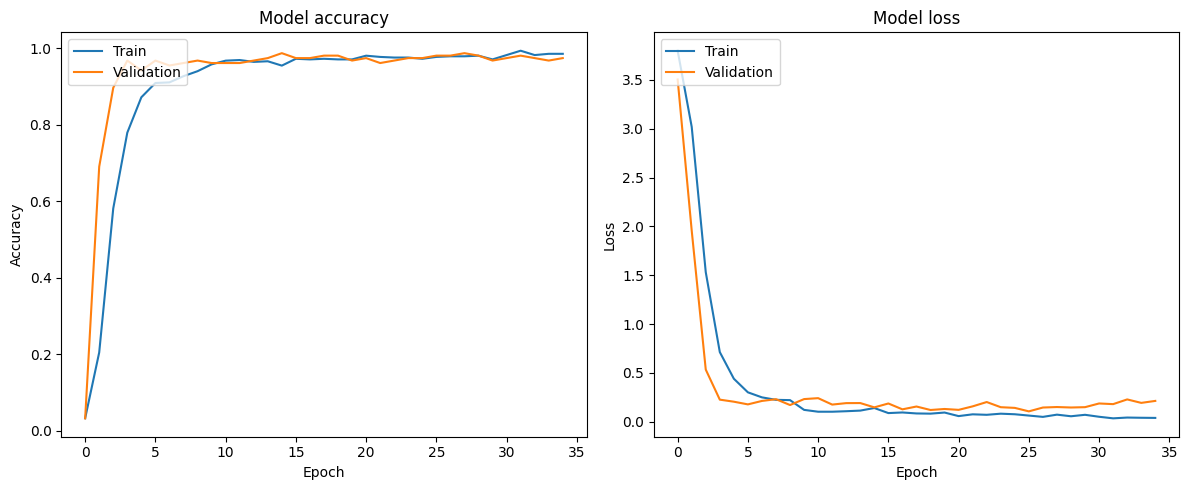

In [18]:
import matplotlib.pyplot as plt

# --- Model Evaluation --- #
print("\n--- Evaluating Model Performance ---")
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# --- Visualize Training History --- #
print("\n--- Plotting Training History ---")
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
           A       1.00      1.00      1.00         4
           B       1.00      1.00      1.00         4
           C       1.00      1.00      1.00         4
           D       1.00      1.00      1.00         2
           E       1.00      1.00      1.00         4
           F       1.00      1.00      1.00         4
           G       1.00      1.00      1.0

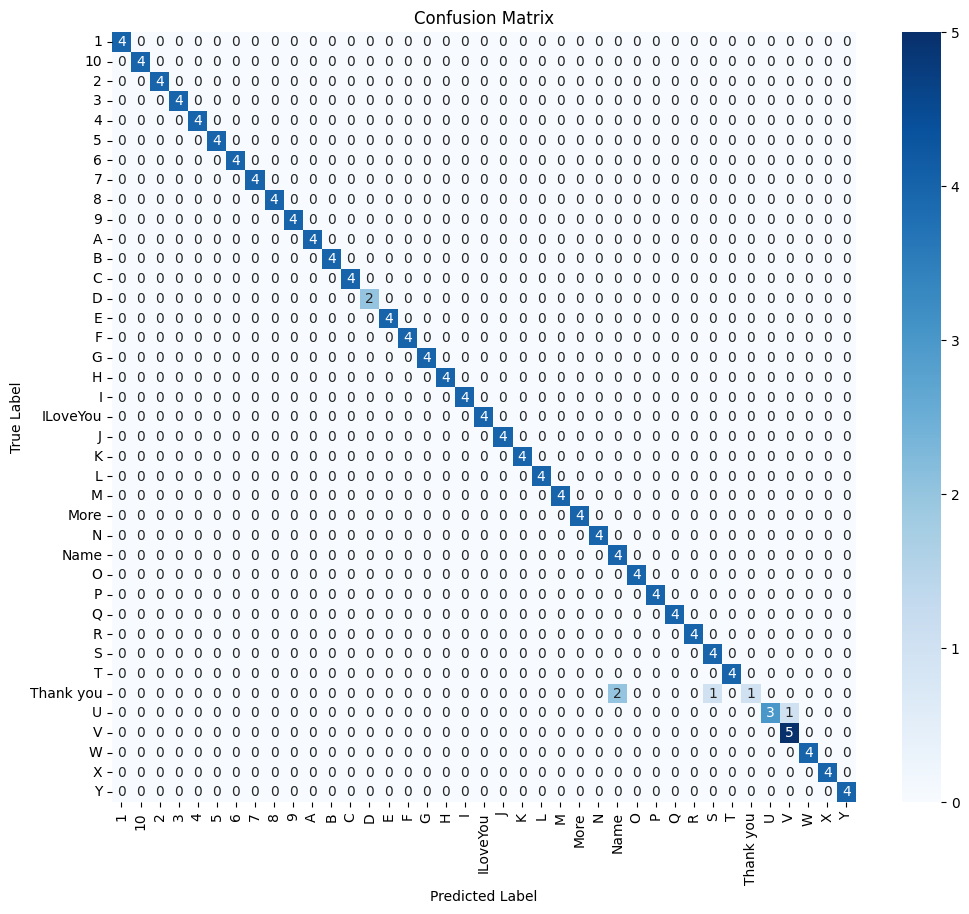

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# After model.evaluate()
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Use the fixed categories list
categories_fixed = categories[:len(np.unique(y_true_classes))]

# Classification Report
print(classification_report(y_true_classes, y_pred_classes,
                           target_names=categories_fixed))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories_fixed, yticklabels=categories_fixed)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Testing


--- Displaying Single Image Prediction ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


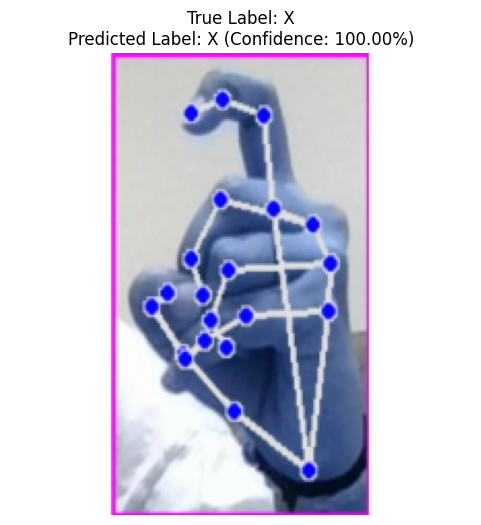

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# --- Display Single Image Prediction --- #
print("\n--- Displaying Single Image Prediction ---")

# Select a random image from the validation set
random_index = np.random.randint(0, len(X_val))
sample_image = X_val[random_index]
sample_label_encoded = y_val[random_index]

# Get the true label
true_label = label_binarizer.inverse_transform(sample_label_encoded.reshape(1, -1))[0]

# Reshape the image for prediction
image_for_prediction = np.expand_dims(sample_image, axis=0)

# Make a prediction
predictions = model.predict(image_for_prediction)
predicted_class_index = np.argmax(predictions)
predicted_label = label_binarizer.classes_[predicted_class_index]
confidence = predictions[0][predicted_class_index] * 100

# Display the image and prediction results
plt.figure(figsize=(6, 6))
plt.imshow(sample_image)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label} (Confidence: {confidence:.2f}%)")
plt.axis('off')
plt.show()

In [21]:
import os

# Use the current working directory (where the notebook or script is running)
BASE_DIR = os.getcwd()

# Paths to save models
cnn_model_path = os.path.join(BASE_DIR, 'asl_cnn_model.h5')
mobilenet_model_path = os.path.join(BASE_DIR, 'asl_mobilenet_model.h5')

# Save models
model.save(cnn_model_path)
model2.save(mobilenet_model_path)

print("Models saved successfully in:", BASE_DIR)


Models saved successfully in: c:\Users\vrtkp\Downloads


In [22]:
import cv2
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math
import os

# ----------------- CONFIG ----------------- #
IMG_SIZE = 224  # Must match your model input size
MODEL_PATH = "asl_mobilenet_model.h5"
DATA_DIR = 'D:/Vrutika/projects/Sign Language Detection/Sign Language Detection/Data'

# ----------------- GET LABELS ----------------- #
labels = sorted([folder for folder in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, folder))])
print("Labels detected:", labels)

# ----------------- INITIALIZE ----------------- #
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier(MODEL_PATH, None)  # We don’t use label.txt

# Offset around hand bounding box
offset = 20

# ----------------- MAIN LOOP ----------------- #
while True:
    success, img = cap.read()
    if not success:
        continue

    imgOutput = img.copy()
    hands, img = detector.findHands(img)

    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        # Create white square background
        imgWhite = np.ones((IMG_SIZE, IMG_SIZE, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        # Skip if crop is invalid
        if imgCrop.shape[0] == 0 or imgCrop.shape[1] == 0:
            continue

        aspectRatio = h / w

        if aspectRatio > 1:
            k = IMG_SIZE / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, IMG_SIZE))
            wGap = math.ceil((IMG_SIZE - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
        else:
            k = IMG_SIZE / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (IMG_SIZE, hCal))
            hGap = math.ceil((IMG_SIZE - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize

        # Predict
        prediction, index = classifier.getPrediction(imgWhite, draw=False)
        predicted_label = labels[index]

        # Draw label and rectangle
        cv2.rectangle(imgOutput, (x - offset, y - offset-50),
                      (x - offset + 150, y - offset), (255, 0, 255), cv2.FILLED)
        cv2.putText(imgOutput, predicted_label, (x, y - 26),
                    cv2.FONT_HERSHEY_COMPLEX, 1.5, (255, 255, 255), 2)
        cv2.rectangle(imgOutput, (x-offset, y-offset),
                      (x + w+offset, y + h+offset), (255, 0, 255), 4)

        # Optional: show cropped image
        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)

    cv2.imshow("ASL Live Detection", imgOutput)

    # Quit on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Labels detected: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'ILoveYou', 'J', 'K', 'L', 'M', 'More', 'N', 'Name', 'O', 'P', 'Q', 'R', 'S', 'T', 'Thank you', 'U', 'V', 'W', 'X', 'Y']


No Labels Found
